<a href="https://colab.research.google.com/github/jadamccallum/springboard/blob/main/Logistic__Regression_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from google.colab import files
uploaded = files.upload()

Saving breast+cancer+wisconsin+diagnostic.zip to breast+cancer+wisconsin+diagnostic.zip


In [12]:
import zipfile
import os
zip_path = "breast+cancer+wisconsin+diagnostic.zip"
extract_path = "breast_cancer_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Current directory files:", os.listdir())

Current directory files: ['.config', 'breast_cancer_data', 'breast+cancer+wisconsin+diagnostic.zip', 'sample_data']


In [13]:
print("Extracted files:", os.listdir("breast_cancer_data"))

Extracted files: ['wdbc.names', 'wdbc.data']


In [16]:
data_file = "breast_cancer_data/wdbc.data"
df = pd.read_csv(data_file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
column_names = [
     "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se", "Compactness_se",
    "Concavity_se", "Concave points_se", "Symmetry_se", "Fractal_dimension_se",
    "Radius_worst", "Texture_worst", "Perimeter_worst", "Area_worst", "Smoothness_worst",
    "Compactness_worst", "Concavity_worst", "Concave points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]
print("Number of columns in df:", df.shape[1])

Number of columns in df: 31


In [29]:
print("Expected number of column names:", len(column_names))

Expected number of column names: 31


In [30]:
print(df.shape)

(569, 31)


In [33]:
df.columns = column_names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   Perimeter_mean           569 non-null    float64
 4   Area_mean                569 non-null    float64
 5   Smoothness_mean          569 non-null    float64
 6   Compactness_mean         569 non-null    float64
 7   Concavity_mean           569 non-null    float64
 8   Concave points_mean      569 non-null    float64
 9   Symmetry_mean            569 non-null    float64
 10  Fractal_dimension_mean   569 non-null    float64
 11  Radius_se                569 non-null    float64
 12  Texture_se               569 non-null    float64
 13  Perimeter_se             569 non-null    float64
 14  Area_se                  5

In [36]:
y = df["Diagnosis"].map({"M": 1, "B": 0})
X = df.drop(columns=["Diagnosis"])
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (569, 30)
Target shape: (569,)


In [37]:
print(df.head())

  Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Symmetry_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [39]:
positive_freq = y.mean()
print(f"Frequency of the positive target (Malignant): {positive_freq * 100:.2f}%")

Frequency of the positive target (Malignant): 37.26%


In [41]:
full_summary = pd.concat([X, y], axis=1).describe()
print(full_summary)

       Radius_mean  Texture_mean  Perimeter_mean    Area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       Smoothness_mean  Compactness_mean  Concavity_mean  Concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

<ipython-input-43-a7e7dcda55db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Diagnosis'] = y


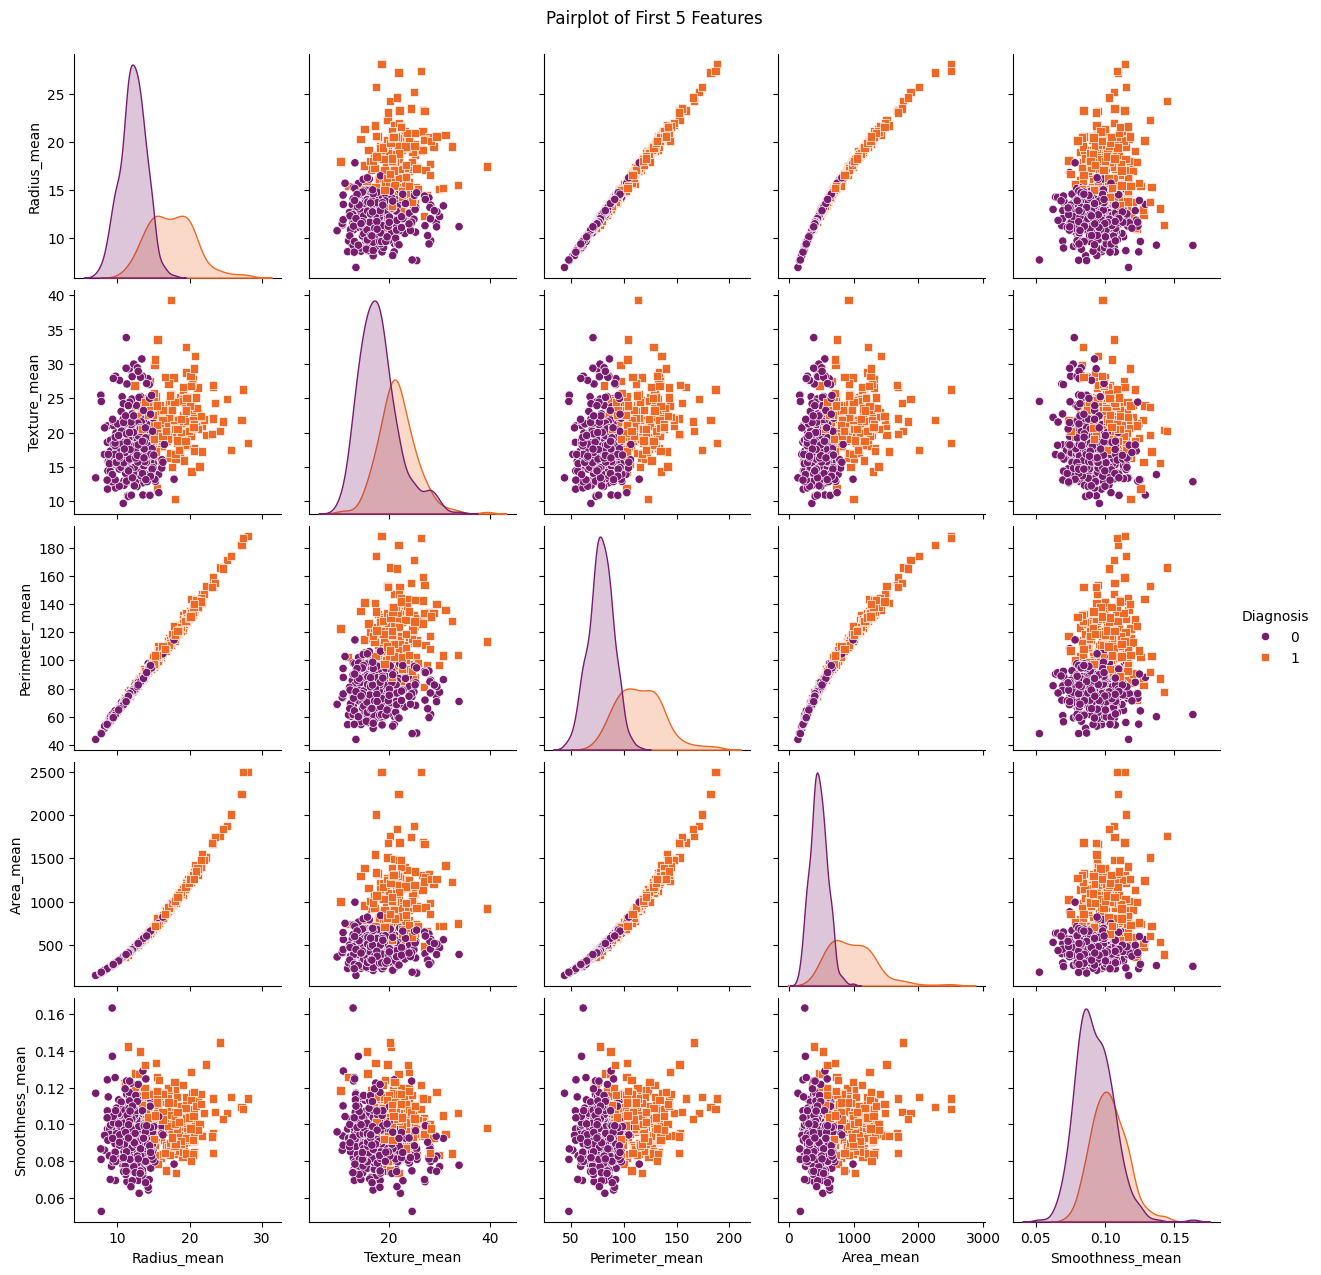

In [43]:
subset = X.iloc[:, :5]
subset['Diagnosis'] = y
sns.pairplot(subset, hue='Diagnosis', markers=["o", "s"], palette="inferno")
plt.suptitle("Pairplot of First 5 Features", y=1.02)
plt.show()

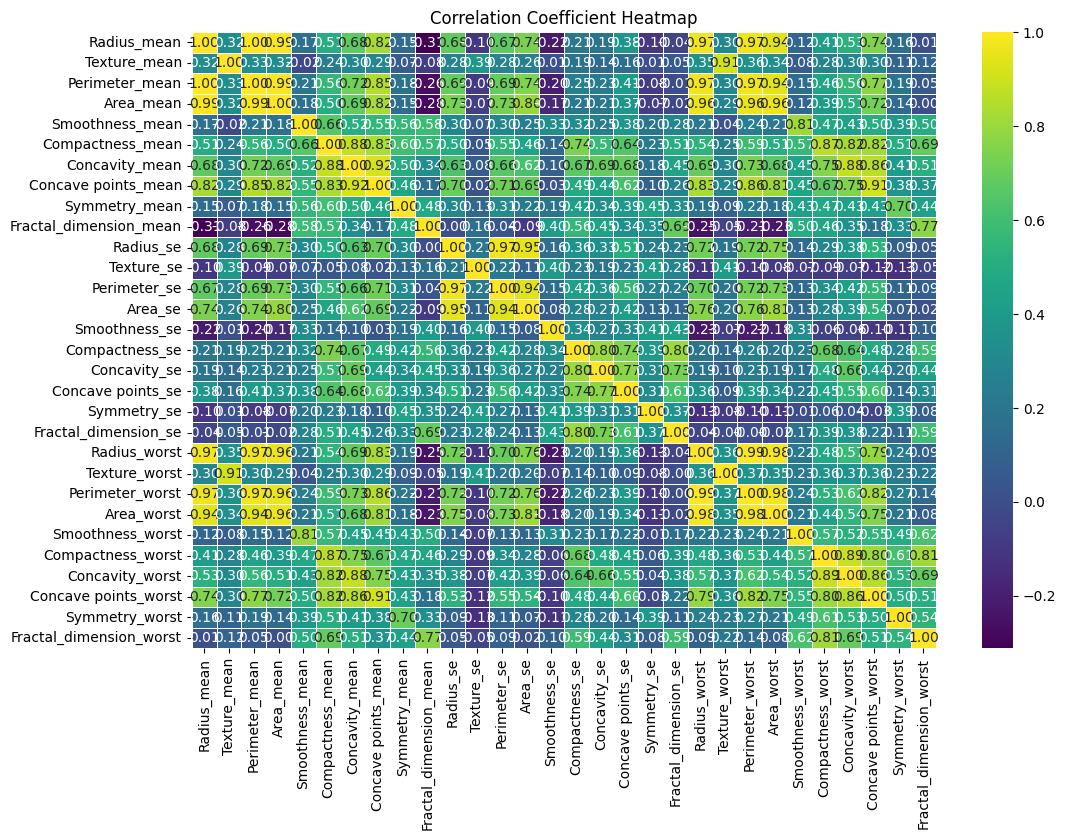

In [46]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Coefficient Heatmap")
plt.show()

<ipython-input-47-5245847e4654>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Radius_mean', data=X, palette="coolwarm")


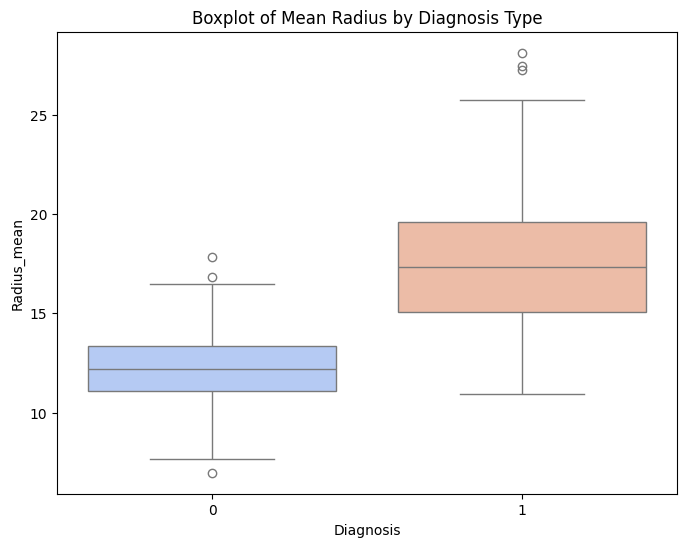

In [47]:
X['Diagnosis'] = y
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='Radius_mean', data=X, palette="coolwarm")
plt.title("Boxplot of Mean Radius by Diagnosis Type")
0plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (455, 31)
Testing Features Shape: (114, 31)
Training Target Shape: (455,)
Testing Target Shape: (114,)


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardizes features (important for Logistic Regression)
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression model
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [52]:
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [53]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # Malignant = 1
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


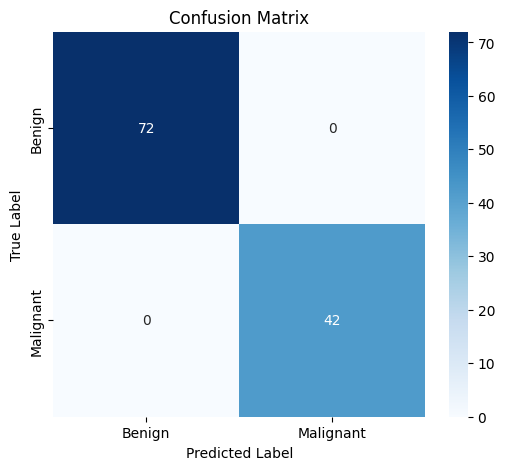

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [57]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [61]:
log_reg = model.named_steps['logreg']
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
print("Intercept:", intercept)
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Intercept: -1.0371854379588896

Feature Coefficients:
Radius_mean: 0.2402
Texture_mean: 0.3015
Perimeter_mean: 0.2333
Area_mean: 0.2505
Smoothness_mean: 0.1895
Compactness_mean: -0.0490
Concavity_mean: 0.2525
Concave points_mean: 0.3708
Symmetry_mean: -0.0013
Fractal_dimension_mean: -0.0996
Radius_se: 0.4484
Texture_se: 0.0404
Perimeter_se: 0.3219
Area_se: 0.3225
Smoothness_se: -0.0322
Compactness_se: -0.2800
Concavity_se: -0.0546
Concave points_se: 0.2020
Symmetry_se: -0.1377
Fractal_dimension_se: -0.2110
Radius_worst: 0.3825
Texture_worst: 0.4705
Perimeter_worst: 0.3409
Area_worst: 0.3610
Smoothness_worst: 0.2324
Compactness_worst: 0.0519
Concavity_worst: 0.2878
Concave points_worst: 0.3845
Symmetry_worst: 0.3214
Fractal_dimension_worst: 0.0610
Diagnosis: 3.0231


In [64]:
scaler = model.named_steps['scaler']
feature_stds = scaler.scale_
normalized_coefficients = coefficients / feature_stds
print("\nNormalized Feature Coefficients:")
for feature, coef in zip(X.columns, normalized_coefficients):
    print(f"{feature}: {coef:.4f}")


Normalized Feature Coefficients:
Radius_mean: 0.0672
Texture_mean: 0.0703
Perimeter_mean: 0.0095
Area_mean: 0.0007
Smoothness_mean: 13.2541
Compactness_mean: -0.9104
Concavity_mean: 3.0943
Concave points_mean: 9.3536
Symmetry_mean: -0.0462
Fractal_dimension_mean: -14.3052
Radius_se: 1.5468
Texture_se: 0.0731
Perimeter_se: 0.1518
Area_se: 0.0067
Smoothness_se: -11.2884
Compactness_se: -15.9038
Concavity_se: -1.7212
Concave points_se: 32.1520
Symmetry_se: -16.5892
Fractal_dimension_se: -80.2579
Radius_worst: 0.0781
Texture_worst: 0.0775
Perimeter_worst: 0.0100
Area_worst: 0.0006
Smoothness_worst: 9.9061
Compactness_worst: 0.3283
Concavity_worst: 1.3587
Concave points_worst: 5.7585
Symmetry_worst: 5.1032
Fractal_dimension_worst: 3.3597
Diagnosis: 6.2490


In [65]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Normalized Coefficient': normalized_coefficients})
coeff_df = coeff_df.reindex(coeff_df['Normalized Coefficient'].abs().sort_values(ascending=False).index)
print("\nSorted Normalized Feature Coefficients:")
print(coeff_df.to_string(index=False))


Sorted Normalized Feature Coefficients:
                Feature  Normalized Coefficient
   Fractal_dimension_se              -80.257876
      Concave points_se               32.151961
            Symmetry_se              -16.589187
         Compactness_se              -15.903784
 Fractal_dimension_mean              -14.305181
        Smoothness_mean               13.254137
          Smoothness_se              -11.288421
       Smoothness_worst                9.906144
    Concave points_mean                9.353635
              Diagnosis                6.248993
   Concave points_worst                5.758543
         Symmetry_worst                5.103165
Fractal_dimension_worst                3.359667
         Concavity_mean                3.094264
           Concavity_se               -1.721237
              Radius_se                1.546785
        Concavity_worst                1.358707
       Compactness_mean               -0.910381
      Compactness_worst                0.328319

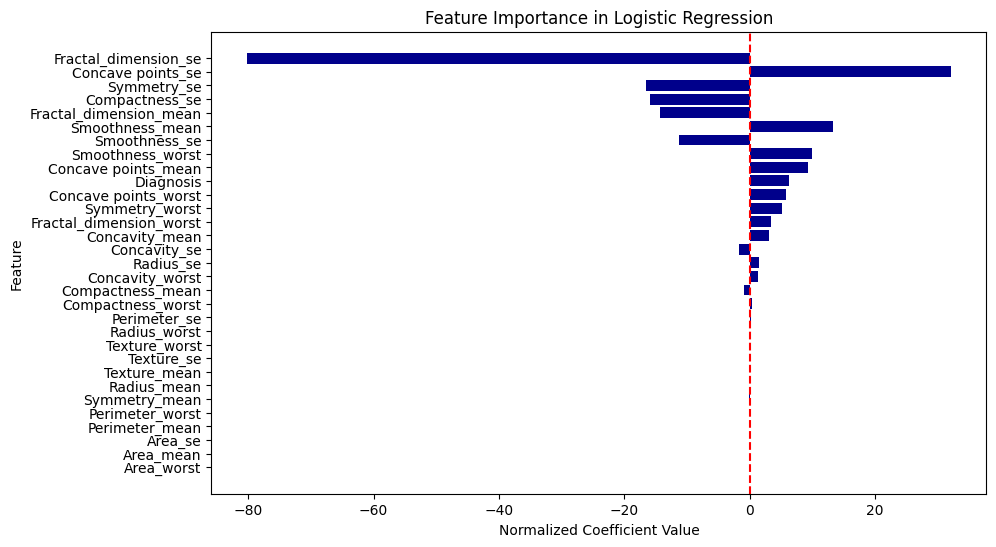

In [66]:
sorted_features = coeff_df.sort_values(by="Normalized Coefficient", key=abs, ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'], sorted_features['Normalized Coefficient'], color="darkblue")
plt.xlabel("Normalized Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.axvline(x=0, color="red", linestyle="--")
plt.gca().invert_yaxis()
plt.show()